In [38]:
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df =  pd.read_csv("../insurance/data/freMTPL2freq.csv")

In [12]:
df

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,1.0,1,0.10000,D,5,0,55,50,B12,Regular,1217,R82
1,3.0,1,0.77000,D,5,0,55,50,B12,Regular,1217,R82
2,5.0,1,0.75000,B,6,2,52,50,B12,Diesel,54,R22
3,10.0,1,0.09000,B,7,0,46,50,B12,Diesel,76,R72
4,11.0,1,0.84000,B,7,0,46,50,B12,Diesel,76,R72
...,...,...,...,...,...,...,...,...,...,...,...,...
678008,6114326.0,0,0.00274,E,4,0,54,50,B12,Regular,3317,R93
678009,6114327.0,0,0.00274,E,4,0,41,95,B12,Regular,9850,R11
678010,6114328.0,0,0.00274,D,6,2,45,50,B12,Diesel,1323,R82
678011,6114329.0,0,0.00274,B,4,0,60,50,B12,Regular,95,R26


In [46]:
df['ClaimNb'].value_counts()

0     643953
1      32178
2       1784
3         82
4          7
11         3
5          2
6          1
8          1
16         1
9          1
Name: ClaimNb, dtype: int64

In [49]:
claim_list=[0,1,2,3]
df=df[df['ClaimNb'].isin(claim_list)]

# Preprocessing

In [35]:
ohe=OneHotEncoder(sparse=False)
transformer=ColumnTransformer([
                            ("cat_transformer",ohe,make_column_selector(dtype_include=["object", "category"]))
                             ],remainder='passthrough')
pipe=Pipeline([("transformer",transformer)])
pd.DataFrame(pipe.fit_transform(df))

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.10000,5.0,0.0,55.0,50.0,1217.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,3.0,1.0,0.77000,5.0,0.0,55.0,50.0,1217.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,5.0,1.0,0.75000,6.0,2.0,52.0,50.0,54.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,10.0,1.0,0.09000,7.0,0.0,46.0,50.0,76.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,11.0,1.0,0.84000,7.0,0.0,46.0,50.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678008,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,6114326.0,0.0,0.00274,4.0,0.0,54.0,50.0,3317.0
678009,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,6114327.0,0.0,0.00274,4.0,0.0,41.0,95.0,9850.0
678010,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,6114328.0,0.0,0.00274,6.0,2.0,45.0,50.0,1323.0
678011,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,6114329.0,0.0,0.00274,4.0,0.0,60.0,50.0,95.0


In [28]:
df

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,1.0,1,0.10000,D,5,0,55,50,B12,Regular,1217,R82
1,3.0,1,0.77000,D,5,0,55,50,B12,Regular,1217,R82
2,5.0,1,0.75000,B,6,2,52,50,B12,Diesel,54,R22
3,10.0,1,0.09000,B,7,0,46,50,B12,Diesel,76,R72
4,11.0,1,0.84000,B,7,0,46,50,B12,Diesel,76,R72
...,...,...,...,...,...,...,...,...,...,...,...,...
678008,6114326.0,0,0.00274,E,4,0,54,50,B12,Regular,3317,R93
678009,6114327.0,0,0.00274,E,4,0,41,95,B12,Regular,9850,R11
678010,6114328.0,0,0.00274,D,6,2,45,50,B12,Diesel,1323,R82
678011,6114329.0,0,0.00274,B,4,0,60,50,B12,Regular,95,R26


# Decision Tree

In [22]:
X = df.drop(columns=['ClaimNb']).values
y = df.ClaimNb.values

In [23]:
tree_clf = DecisionTreeRegressor(max_depth=3, random_state=2)
tree_clf.fit(X,y)

ValueError: could not convert string to float: 'D'

# EDA Exploratory Data Analysis

In [50]:
df

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,1.0,1,0.10000,D,5,0,55,50,B12,Regular,1217,R82
1,3.0,1,0.77000,D,5,0,55,50,B12,Regular,1217,R82
2,5.0,1,0.75000,B,6,2,52,50,B12,Diesel,54,R22
3,10.0,1,0.09000,B,7,0,46,50,B12,Diesel,76,R72
4,11.0,1,0.84000,B,7,0,46,50,B12,Diesel,76,R72
...,...,...,...,...,...,...,...,...,...,...,...,...
678008,6114326.0,0,0.00274,E,4,0,54,50,B12,Regular,3317,R93
678009,6114327.0,0,0.00274,E,4,0,41,95,B12,Regular,9850,R11
678010,6114328.0,0,0.00274,D,6,2,45,50,B12,Diesel,1323,R82
678011,6114329.0,0,0.00274,B,4,0,60,50,B12,Regular,95,R26


<AxesSubplot:xlabel='VehBrand', ylabel='ClaimNb'>

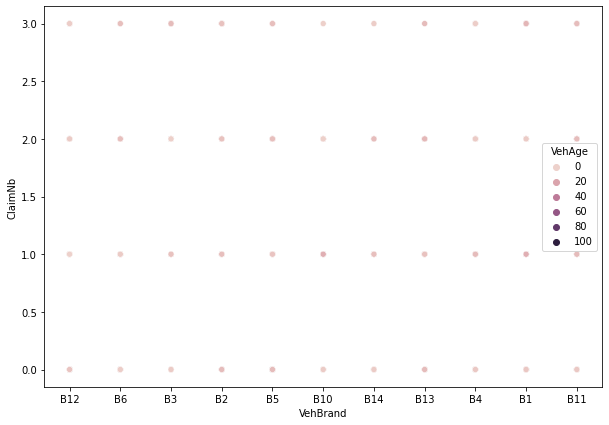

In [51]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x="VehBrand", y="ClaimNb", hue='VehAge',
                sizes=(10, 300), data=df)

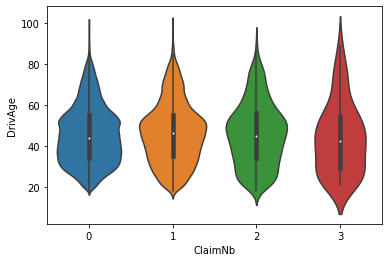

In [52]:
ax = sns.violinplot(x="ClaimNb", y="DrivAge", data=df)

# Run Model

In [18]:
model=smf.ols(formula='ClaimNb ~ VehPower + VehAge + DrivAge', data= df).fit()
model.rsquared

0.0005982939753864658

In [17]:
df['ClaimNb'].unique()

array([ 1,  2,  4,  3, 11,  0,  5,  6,  8, 16,  9])